## Dynamic Pricing Strategy using Python

Dynamic Pricing is an application of data science that involves adjusting the prices of a product or service based on various factors in real time. It is used by companies to optimize revenue by setting flexible prices that respond to market demand, demographics, customer behaviour and competitor prices

## What is Dynamic Pricing?

Dynamic Pricing is an application of Data Science that involves adjusting product or service prices based on various factors in real time. It is employed by businesses to optimize their revenue and profitability by setting flexible prices that respond to market demand, customer behaviour, and competitor pricing.

Using data-driven insights and algorithms, businesses can dynamically modify prices to achieve the most favourable outcomes.

For example, consider a ride-sharing company operating in a metropolitan area. The company wants to optimize its pricing strategy to maximize revenue and improve customer satisfaction. The traditional pricing model used by the business is based on fixed rates per kilometre, which does not account for fluctuations in supply and demand.

By implementing a dynamic pricing strategy, the company can leverage data science techniques to analyze various factors such as historical trip data, real-time demand, traffic patterns, and events happening in the area.

Using Machine Learning algorithms, the company can analyze data and adjust its prices in real-time. When demand is high, such as during rush hours or major events, the algorithm can increase the cost of the rides to incentivize more drivers to be available and balance the supply and demand. Conversely, during periods of low demand, the algorithm can lower the prices to attract more customers.

## Dynamic Pricing Strategy: Overview

So, in a dynamic pricing strategy, the aim is to maximize revenue and profitability by pricing items at the right level that balances supply and demand dynamics. It allows businesses to adjust prices dynamically based on factors like time of day, day of the week, customer segments, inventory levels, seasonal fluctuations, competitor pricing, and market conditions.

To implement a data-driven dynamic pricing strategy, businesses typically require data that can provide insights into customer behaviour, market trends, and other influencing factors. So to create a dynamic pricing strategy, we need to have a dataset based on:

* historical sales data
* customer purchase patterns
* market demand forecasts
* cost data
* customer segmentation data,
* and real-time market data.


I found an ideal dataset to create a Dynamic Pricing Strategy based on the example we discussed above.

## Dynamic Pricing Strategy using Python

Let’s start the task of building a dynamic pricing strategy by importing the necessary Python libraries and the dataset:

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

price = pd.read_csv("dynamic_pricing.csv")
price.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


* A ride-sharing company wants to implement a dynamic pricing strategy to optimize fares based on real-time market conditions. The company only uses ride duration to decide ride fares currently. The company aims to leverage data-driven techniques to analyze historical data and develop a predictive model that can dynamically adjust prices in response to changing factors.

* A dataset containing historical ride data has been provided. The dataset includes features such as the number of riders, number of drivers, location category, customer loyalty status, number of past rides, average ratings, time of booking, vehicle type, expected ride duration, and historical cost of the rides.

* Your goal is to build a dynamic pricing model that incorporates the provided features to predict optimal fares for rides in real-time. The model must consider factors such as demand patterns and supply availability.

## Exploratory Data Analysis

Let’s have a look at the descriptive statistics of the data:

In [2]:
price.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


Now let’s have a look at the relationship between expected ride duration and the historical cost of the ride:

In [3]:
fig_durationVScost = px.scatter(price , x = "Expected_Ride_Duration" , y = "Historical_Cost_of_Ride",
                               title= "Expected Ride Duration VS Historical Cost of Ride" , trendline= "ols")
fig_durationVScost.show()

In [4]:
price.columns

Index(['Number_of_Riders', 'Number_of_Drivers', 'Location_Category',
       'Customer_Loyalty_Status', 'Number_of_Past_Rides', 'Average_Ratings',
       'Time_of_Booking', 'Vehicle_Type', 'Expected_Ride_Duration',
       'Historical_Cost_of_Ride'],
      dtype='object')

Now let’s have a look at the distribution of the historical cost of rides based on the vehicle type:

In [5]:
fig_costVSvechile = px.box(price , x = "Vehicle_Type", y = "Historical_Cost_of_Ride",
                           title= "Historical Cost of Ride as per Vechile Type" )
fig_costVSvechile.show()

Now let’s have a look at the correlation matrix:

In [6]:
corr_matrix =  price.corr(numeric_only= True)

corr_matrix

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
Number_of_Riders,1.000000,0.627016,0.029265,0.008572,-0.015856,0.005826
Number_of_Drivers,0.627016,1.000000,0.039660,0.041204,-0.024418,0.017082
Number_of_Past_Rides,0.029265,0.039660,1.000000,-0.064734,0.030679,0.035859
Average_Ratings,0.008572,0.041204,-0.064734,1.000000,-0.016968,-0.001063
Expected_Ride_Duration,-0.015856,-0.024418,0.030679,-0.016968,1.000000,0.927547
Historical_Cost_of_Ride,0.005826,0.017082,0.035859,-0.001063,0.927547,1.000000


In [7]:
fig_corr = go.Figure(data= go.Heatmap(
            x = corr_matrix.columns,
            y = corr_matrix.columns,
            z = corr_matrix.values, 
            colorscale= "Viridis" , ))

fig_corr.update_layout(title = "Correlation Matrix")
fig_corr.show()

## Implementing a Dynamic Pricing Strategy

The data provided by the company states that the company uses a pricing model that only takes the expected ride duration as a factor to determine the price for a ride. Now, we will implement a dynamic pricing strategy aiming to adjust the ride costs dynamically based on the demand and supply levels observed in the data. It will capture high-demand periods and low-supply scenarios to increase prices, while low-demand periods and high-supply situations will lead to price reductions.

Here’s how to implement this dynamic pricing strategy using Python:

In [22]:
import numpy as np

#Calculate demand_multiplier based on  percentile for high and low demand
high_demand_percentile = 75
low_demand_percentile = 25

price["demand_multiplier"] = np.where(price["Number_of_Riders"] > np.percentile(price["Number_of_Riders"], high_demand_percentile),#Condition
                                      price["Number_of_Riders"] / np.percentile(price["Number_of_Riders"], high_demand_percentile),#Value if True                                        
                                      price["Number_of_Riders"] / np.percentile(price["Number_of_Riders"], low_demand_percentile) # Value if False 
                                      ) ##np.where(condition, value_if_true, value_if_false)

#Calculate supply_multiplier based on percentile for high and low supply 
high_supply_percentile = 75
low_supply_percentile = 25

price["supply_multiplier"] = np.where(price["Number_of_Drivers"] > np.percentile(price["Number_of_Drivers"], low_supply_percentile),#Condition
                                      np.percentile(price["Number_of_Drivers"], high_demand_percentile)/ price["Number_of_Drivers"],  #Value if True                                      
                                      np.percentile(price["Number_of_Drivers"], low_demand_percentile)/ price["Number_of_Drivers"] # Value if False 
                                     ) ##np.where(condition, value_if_true, value_if_false)

 #Define price adjustment factors for high  and low demand / supply

demand_threshold_high = 1.2  #Higher Demand Threshold
demand_threshold_low = 0.8  #Lower Demand Threshold
supply_threshold_high = 0.8  #Higher Supply Threshold
supply_threshold_low = 1.2  #Lower Supply Threshold


#Calculate Adjusted_Ride_cost for dynamic pricing
#implementing dynamic pricing by adjusting the historical ride cost based on demand and
#supply multipliers—with constraints (thresholds) to avoid extreme fluctuations.

price["adjusted_ride_cost"] = price["Historical_Cost_of_Ride"] * (
                                                                np.maximum(price["demand_multiplier"] , demand_threshold_low) * # value
                                                                     np.maximum(price["supply_multiplier"] , supply_threshold_high) # threshold
                                                                ) # np.maximum(value, threshold)
                                      

In the above code, we first calculated the demand multiplier by comparing the number of riders to percentiles representing high and low demand levels. If the number of riders exceeds the percentile for high demand, the demand multiplier is set as the number of riders divided by the high-demand percentile. Otherwise, if the number of riders falls below the percentile for low demand, the demand multiplier is set as the number of riders divided by the low-demand percentile.

Next, we calculated the supply multiplier by comparing the number of drivers to percentiles representing high and low supply levels. If the number of drivers exceeds the low-supply percentile, the supply multiplier is set as the high-supply percentile divided by the number of drivers. On the other hand, if the number of drivers is below the low-supply percentile, the supply multiplier is set as the low-supply percentile divided by the number of drivers.

Finally, we calculated the adjusted ride cost for dynamic pricing. It multiplies the historical cost of the ride by the maximum of the demand multiplier and a lower threshold (demand_threshold_low), and also by the maximum of the supply multiplier and an upper threshold (supply_threshold_high). This multiplication ensures that the adjusted ride cost captures the combined effect of demand and supply multipliers, with the thresholds serving as caps or floors to control the price adjustments.

Now let’s calculate the profit percentage we got after implementing this dynamic pricing strategy:

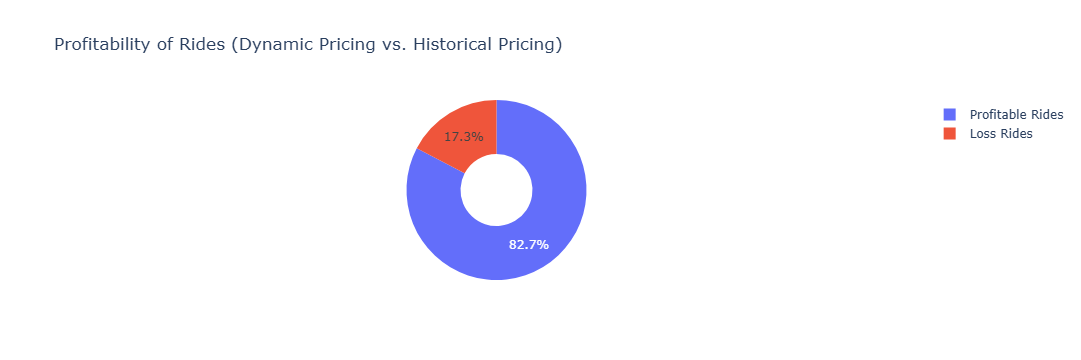

In [23]:
#Calculate the Profit Percentage of each ride
price["profit_percentage"] = ((price["adjusted_ride_cost"] - price["Historical_Cost_of_Ride"]) / price["Historical_Cost_of_Ride"]) *100


# Identify Profitable ride where profit percentage is positive
profitable_rides = price[price["profit_percentage"] > 0]

# Identify Loss ride where profit percentage is Negative
loss_rides = price[price["profit_percentage"] < 0]


import plotly.graph_objects as go


#Calculate the count of profitable and loss rides

profitable_counts = len(profitable_rides)
loss_counts = len(loss_rides)


#Create a donut Chart to show the distribution  of Profitable  and Loss rides
labels = ["Profitable Rides" , "Loss Rides"]
values = [profitable_counts , loss_counts]

fig_profitVSloss = go.Figure(data = [go.Pie(labels= labels , values= values , hole = 0.4)])

fig_profitVSloss.update_layout(title = "Profitability of Rides (Dynamic Pricing vs. Historical Pricing)")
fig_profitVSloss.show()

Now let’s have a look at the relationship between the expected ride duration and the cost of the ride based on the dynamic pricing strategy:

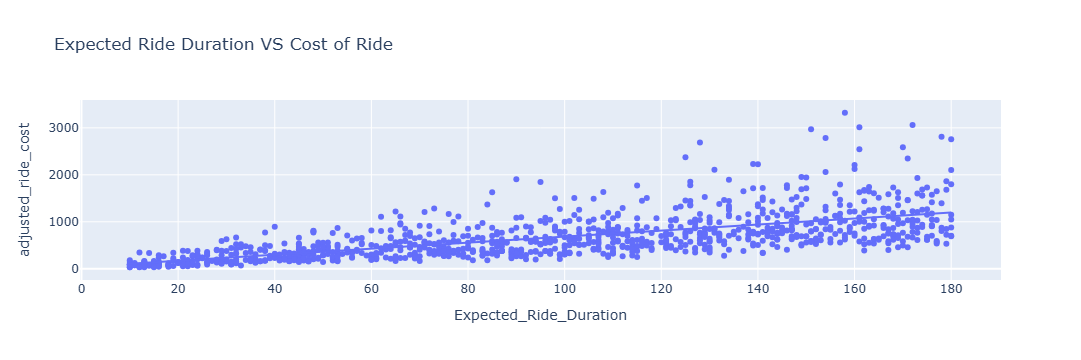

In [27]:
fig_durationVSadjusted_ride_cost = px.scatter(price , x = "Expected_Ride_Duration" ,y = "adjusted_ride_cost",
                                             title= "Expected Ride Duration VS Cost of Ride" , trendline= "ols")

fig_durationVSadjusted_ride_cost.show()

## Training a Predictive Model

Now, as we have implemented a dynamic pricing strategy, let’s train a Machine Learning model. Before training the model, let’s preprocess the data:

In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


def data_preprocessing_pipeline(price):
    #Identify numeric and categorical features
    numerical_features = price.select_dtypes(include=["float","int"]).columns
    categorical_features = price.select_dtypes(include=["object"]).columns

    #Handle missing Values in numeric features
    price[numerical_features] = price[numerical_features].fillna(price[numerical_features].mean())


    # Detect and Handle Outliers in Numeric features using IQR
    for nfeature in numerical_features:
        Q1 = price[nfeature].quantile(0.25)
        Q3 = price[nfeature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 - (1.5 * IQR)
        price[nfeature] = np.where((price[nfeature] < lower_bound) | (price[nfeature] < lower_bound),
                                    price[nfeature].mean() , price[nfeature])

    #Handling missing values in categorical feature
    price[categorical_features] = price[categorical_features].fillna(price[categorical_features].mode().iloc[0])

    return price

In the above code, we have implemented a data preprocessing pipeline to preprocess the data.You can learn more about it here below:

https://amanxai.com/2023/06/19/data-preprocessing-pipeline-using-python/

As vehicle type is a valuable factor, let’s convert it into a numerical feature before moving forward:

In [40]:
price["Vehicle_Type"] = price["Vehicle_Type"].map({"Premium" : 1 , "Economy": 0})

Now let’s split the data and train a Machine Learning model to predict the cost of a ride:

In [42]:
#Splitting Data 
from sklearn.model_selection import train_test_split
X = np.array(price[["Number_of_Riders","Number_of_Drivers", "Vehicle_Type", "Expected_Ride_Duration",]])
y = np.array(price[["adjusted_ride_cost"]])


X_train , X_test , y_train , y_test = train_test_split(X,y , test_size= 0.2, random_state= 42)

#Reshape y to 1D array
#The .ravel() function is a NumPy method that flattens an array — it converts a multi-dimensional array into a 1D array (if possible).
y_train = y_train.ravel()
y_test = y_test.ravel()

# Training the Random Forest Regression Model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train , y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Now let’s test this Machine Learning model using some input values:

In [47]:
def get_vehicle_type_numeric(vehicle_type):
    vehicle_type_mapping = {"Premium" : 1 , "Economy": 0}
    vehicle_type_numeric = vehicle_type_mapping.get(vehicle_type)
    return vehicle_type_numeric

#Predicting using user input value
def predict_price(number_of_riders,number_of_drivers, vehicle_type ,Expected_Ride_Duration ):
    vehicle_type_numeric = get_vehicle_type_numeric(vehicle_type)
    if vehicle_type_numeric is None: 
        raise ValueError("Invalid Vehicle Type")

    input_data = np.array([[number_of_riders,number_of_drivers, vehicle_type_numeric ,Expected_Ride_Duration]]) 
    predicted_price = model.predict(input_data)
    return predicted_price

#Example prediction using user input values
user_number_of_riders = int(input("Number of Riders"))
user_number_of_drivers = int(input("Number of Drivers"))
user_vehicle_type = str(input("Vehicle Type : Premium or Economy"))
Expected_Ride_Duration = float(input("Duration in Minute"))
predicted_price = predict_price(user_number_of_riders, user_number_of_drivers ,user_vehicle_type , Expected_Ride_Duration )


print("Predicted price:", predicted_price)

Number of Riders 25
Number of Drivers 25
Vehicle Type : Premium or Economy Economy
Duration in Minute 25


Predicted price: [161.33030017]


## Here’s a comparison of the actual and predicted results:

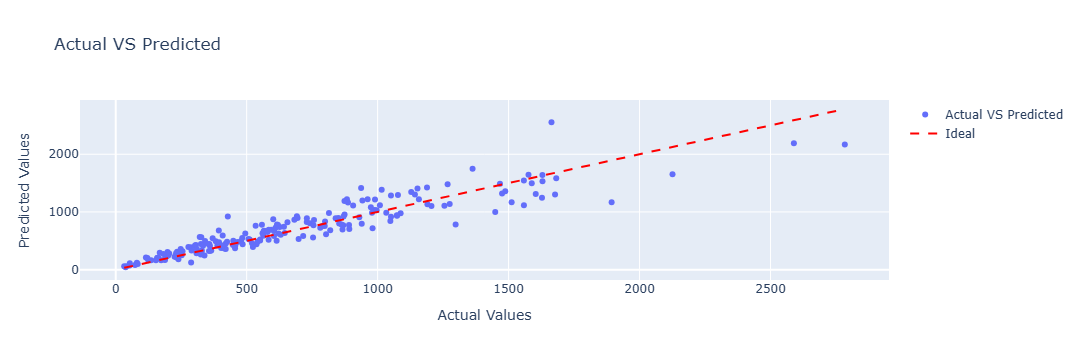

In [51]:
import plotly.graph_objects as go

#Predict on the test set
y_pred = model.predict(X_test)

#Create a Scatter Plot with Actual and Predicted Values
fig_predVSactual = go.Figure()

fig_predVSactual.add_trace(go.Scatter(
                            x = y_test.flatten() ,# convert a multi-dimensional array into a 1D (flat) array , Similar to .ravel()
                            y = y_pred,
                            mode = "markers",
                            name = "Actual VS Predicted"
                            ))

#Add a line representing the Ideal Case
fig_predVSactual.add_trace(go.Scatter(
                            x = [min(y_test.flatten()) ,max(y_test.flatten()) ] , 
                            y = [min(y_test.flatten()) ,max(y_test.flatten()) ],
                            mode = "lines",
                            name = "Ideal",
                            line= dict(color = "red" , dash = "dash")   
))

fig_predVSactual.update_layout(
                        title = "Actual VS Predicted",
                        xaxis_title = "Actual Values",
                        yaxis_title = "Predicted Values",
                        showlegend = True,
                         )
fig_predVSactual.show()

So this is how you can use Machine Learning to implement a data-driven dynamic pricing strategy using Python.

## Summary

In a dynamic pricing strategy, the aim is to maximize revenue and profitability by pricing items at the right level that balances supply and demand dynamics. It allows businesses to adjust prices dynamically based on factors like time of day, day of the week, customer segments, inventory levels, seasonal fluctuations, competitor pricing, and market conditions.